# Limpieza de Datos I

In [1]:
#Primero importamos las librerías que vamos a usar
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [183]:
#Después importamos los datos del archivo CSV que tenemos
df_bmw = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/bmw_pricing_v3.csv")

In [184]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [185]:
#Una vez comprobado que el DataFrame carga bien, voy a ver la estructura que tienen los datos.
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [186]:
#Reemplazlo los valores nulos de la columna "marca"
df_bmw["marca"].fillna("BMW", inplace= True)

df_bmw["marca"].value_counts()

marca
BMW    4843
Name: count, dtype: int64

In [187]:
#Elimino los valores nulos de la columna "modelo"
df_bmw = df_bmw.dropna(subset="modelo")

df_bmw["modelo"].isnull().sum()

0

In [188]:
#Para una mejor compresiónd el DataFrame, creo una nueva columna con marca y modelo.
df_bmw["marca_modelo"] = df_bmw["marca"]+ " "+ df_bmw["modelo"]

In [189]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,BMW 118
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,BMW M4
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,BMW 320
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,BMW 420
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,BMW 425


In [190]:
#Para una mejor comprensión del DataFrame voy a eliminar las columnas que no considero importantes o que tengan demasiados valores nulos.
col_elim = ["fecha_venta", "modelo", "marca", "fecha_registro", "asientos_traseros_plegables", "fecha_venta_AÑO", "fecha_venta_MES"]

for columna in col_elim:
    if columna in df_bmw.columns:
        df_bmw.drop(columna, axis=1, inplace=True)

df_bmw.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,BMW 118
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,BMW M4
2,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,BMW 320
3,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,BMW 420
4,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,BMW 425


In [192]:
#Vamos a buscar los nulos y a quitarlos de enmedio
sin_nulos = ["km", "potencia", "tipo_gasolina", "volante_regulable", "camara_trasera", "elevalunas_electrico", "precio"]
df_bmw2 = df_bmw.dropna(subset=sin_nulos)

df_bmw2.isnull().sum()

km                         0
potencia                   0
tipo_gasolina              0
color                    442
tipo_coche              1450
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
marca_modelo               0
dtype: int64

In [193]:
#Y ahora guardo una copia en df_bmw3
df_bmw3= df_bmw2.copy()

<Axes: >

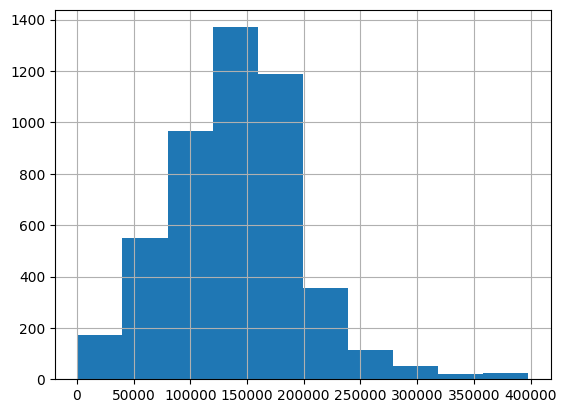

In [195]:
#Me salen algunos outliers en la columna "km" en un primer vistazo por lo que procedo a su eliminación para que los datos estén mas normalizados
df_bmw3.drop(df_bmw3[((df_bmw3["km"]<0) | (df_bmw3["km"]>400000))].index, inplace=True)

df_bmw3["km"].hist()

<Axes: >

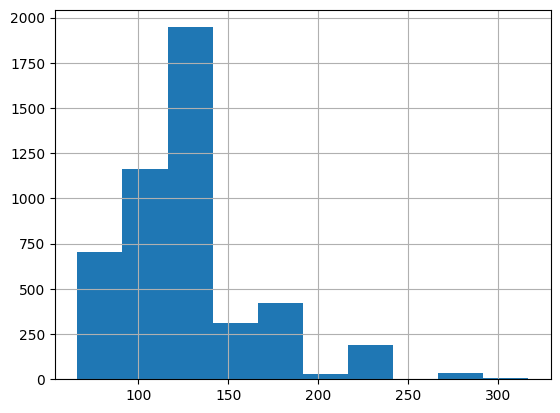

In [196]:
#Ahora paso a quitar los outliers de la columna de "potencia" ya que no nos dicen mucho y así normalizamos los datos
df_bmw3.drop(df_bmw3[((df_bmw3["potencia"]<=50) | (df_bmw3["potencia"]>=400))].index, inplace=True)
df_bmw3["potencia"].hist()

<Axes: >

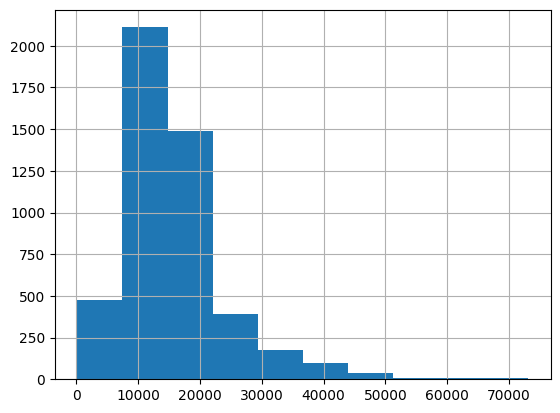

In [198]:
#Ahora hago lo mismo con los outliers de la columna "precio"
df_bmw3.drop(df_bmw3[((df_bmw3["precio"]<=100) | (df_bmw3["precio"]>=75000))].index, inplace=True)
df_bmw3["precio"].hist()

In [199]:
#Ahora los valores nulos de las columnas "color" y "tipo_coche" los cambio a "desconocido"
df_bmw3["color"].fillna("desconocido", inplace=True)
df_bmw3["tipo_coche"].fillna("desconocido", inplace=True)

df_bmw3.isnull().sum()

km                        0
potencia                  0
tipo_gasolina             0
color                     0
tipo_coche                0
volante_regulable         0
aire_acondicionado      481
camara_trasera            0
elevalunas_electrico      0
bluetooth               721
gps                       0
alerta_lim_velocidad    721
precio                    0
marca_modelo              0
dtype: int64

In [200]:
#Hago una copia de la tabla a modo de punto de control y sigo avanzando
df_bmw4 = df_bmw3.copy()

In [201]:
#Vuelvo a guardar el DataFrame en un archivo Pickle para seguir mas adelante
pd.to_pickle(df_bmw4,"/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

# Limpieza de Datos II

In [212]:
#Recupero el archivo .pickle para seguir trabajando desde ahí en una nueva variable
df_bmw5 = pd.read_pickle("primera_entrega_15ENE24_PK")

In [213]:
# Calculo la cantidad de apariciones de cada valor en la columna
counts = df_bmw5["marca_modelo"].value_counts()
# Selecciono los valores que aparecen más de 3 veces
valores_a_retener = counts[counts > 3].index.tolist()
# Filtrar para mantener solo las filas que contienen esos valores
df_bmw5 = df_bmw5.groupby("marca_modelo").filter(lambda x: x.name in valores_a_retener)

df_bmw5["marca_modelo"].value_counts()

marca_modelo
BMW 320                  743
BMW 520                  629
BMW 318                  560
BMW X3                   435
BMW 116                  357
BMW X1                   273
BMW 316                  233
BMW X5                   231
BMW 525                  182
BMW 530                  157
BMW 118                  142
BMW 318 Gran Turismo      97
BMW 320 Gran Turismo      73
BMW 518                   66
BMW X4                    45
BMW 535                   45
BMW X6                    44
BMW 420                   42
BMW 120                   36
BMW 330                   33
BMW 730                   33
BMW 420 Gran Coupé        33
BMW 520 Gran Turismo      23
BMW 325                   19
BMW 530 Gran Turismo      18
BMW 740                   18
BMW 640 Gran Coupé        18
BMW X5 M                  17
BMW 114                   15
BMW 218 Active Tourer     13
BMW M550                  12
BMW 218                   12
BMW 218 Gran Tourer        9
BMW 418 Gran Coupé         8
B

In [214]:
#Procedo a sustituir los valores nulos de las columnas "aire_acondicionado", "bluetooth" y "alerta_limite_velocidad" por sus medianas ya que no me interesan eliminarlos completamente por los porcentajes de datos que representan.
df_bmw5["aire_acondicionado"].fillna(df_bmw5["aire_acondicionado"].mean(), inplace=True)
df_bmw5["bluetooth"].fillna(df_bmw5["bluetooth"].mean(), inplace=True)
df_bmw5["alerta_lim_velocidad"].fillna(df_bmw5["alerta_lim_velocidad"].mean(), inplace=True)

In [215]:
#Ahora transformo las columnas booleanas en valores numéricos 0 y 1
columns_convert = ["volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad"]

for col in columns_convert:
    df_bmw5[col] = df_bmw5[col].astype("int64")

df_bmw5.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,desconocido,1,1,0,1,0,1,0,11300.0,BMW 118
2,183297.0,120.0,diesel,white,desconocido,0,0,0,1,0,1,0,10200.0,BMW 320
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,BMW 420
5,152352.0,225.0,petrol,black,desconocido,1,1,0,1,1,1,1,17100.0,BMW 335
6,205219.0,145.0,diesel,grey,convertible,1,1,0,1,1,1,1,12400.0,BMW 325


In [216]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4755 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4755 non-null   float64
 1   potencia              4755 non-null   float64
 2   tipo_gasolina         4755 non-null   object 
 3   color                 4755 non-null   object 
 4   tipo_coche            4755 non-null   object 
 5   volante_regulable     4755 non-null   int64  
 6   aire_acondicionado    4755 non-null   int64  
 7   camara_trasera        4755 non-null   int64  
 8   elevalunas_electrico  4755 non-null   int64  
 9   bluetooth             4755 non-null   int64  
 10  gps                   4755 non-null   int64  
 11  alerta_lim_velocidad  4755 non-null   int64  
 12  precio                4755 non-null   float64
 13  marca_modelo          4755 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 557.2+ KB


In [226]:
df_bmw5["tipo_gasolina"] = df_bmw5["tipo_gasolina"].str.lower()
df_bmw5["tipo_gasolina"].value_counts()

tipo_gasolina
diesel    4326
petrol     139
Name: count, dtype: int64

In [227]:
#He creado un diccionario con las columnas y valores ya que de otra forma, el sistema me da un warning que me afecta al DataFrame mas adelante.
col_val = {
    "tipo_gasolina": ["hybrid_petrol", "electro"],
    "color": ["orange", "green", "beige", "red"],
    "tipo_coche": ["van", "convertible", "coupe", "subcompact"]
}

In [228]:
for columna, val_elim in col_val.items():
    df_bmw5[columna].replace(val_elim, inplace=True, value=np.nan)

In [229]:
#Ahora filtro las columnas para eliminar los valores nulos.
columnas_nan = ["tipo_gasolina", "color", "tipo_coche"]
df_bmw5 = df_bmw5.dropna(subset=columnas_nan)

df_bmw5.isnull().sum()

km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
marca_modelo            0
dtype: int64

In [230]:
df_bmw5.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,desconocido,1,1,0,1,0,1,0,11300.0,BMW 118
2,183297.0,120.0,diesel,white,desconocido,0,0,0,1,0,1,0,10200.0,BMW 320
5,152352.0,225.0,petrol,black,desconocido,1,1,0,1,1,1,1,17100.0,BMW 335
11,228000.0,145.0,diesel,black,desconocido,1,1,0,1,0,1,0,13300.0,BMW 325
12,132025.0,135.0,diesel,blue,desconocido,1,0,0,1,1,1,0,21700.0,BMW 420


In [231]:
pd.to_pickle(df_bmw5, "/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

# Análisis Univariable y Correlación Inicial

In [232]:
df_bmw6 = pd.read_pickle("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

In [233]:
#Voy a realizar una primera visualización de las correlaciones entre las distintas columnas.

corr = df_bmw6.corr(numeric_only=True)
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
km,1.000000,-0.032146,0.070873,0.009099,0.004944,0.056138,-0.027951,0.170083,-0.019211,-0.426015
potencia,-0.032146,1.000000,0.322185,0.155736,0.317605,0.343101,0.189559,0.007694,0.426437,0.674865
volante_regulable,0.070873,0.322185,1.000000,0.257885,0.254473,0.268077,0.113828,0.247558,0.184741,0.285815
aire_acondicionado,0.009099,0.155736,0.257885,1.000000,0.100452,0.234154,0.091914,0.308026,0.149645,0.219988
camara_trasera,0.004944,0.317605,0.254473,0.100452,1.000000,0.197510,0.122841,0.063005,0.172134,0.265771
elevalunas_electrico,0.056138,0.343101,0.268077,0.234154,0.197510,1.000000,0.233151,0.201036,0.289460,0.281208
bluetooth,-0.027951,0.189559,0.113828,0.091914,0.122841,0.233151,1.000000,0.114200,0.085491,0.191959
gps,0.170083,0.007694,0.247558,0.308026,0.063005,0.201036,0.114200,1.000000,-0.067822,0.005952
alerta_lim_velocidad,-0.019211,0.426437,0.184741,0.149645,0.172134,0.289460,0.085491,-0.067822,1.000000,0.391468
precio,-0.426015,0.674865,0.285815,0.219988,0.265771,0.281208,0.191959,0.005952,0.391468,1.000000


# Análisis Variable vs Target

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel    4326
petrol     139
Name: count, dtype: int64 

color 
 color
black          1420
grey           1005
blue            601
white           448
desconocido     419
brown           298
silver          274
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
desconocido    1397
estate         1078
sedan           797
suv             726
hatchback       467
Name: count, dtype: int64 

[[<Axes: title={'center': 'volante_regulable'}>]]
[[<Axes: title={'center': 'aire_acondicionado'}>]]
[[<Axes: title={'center': 'camara_trasera'}>]]
[[<Axes: title={'center': 'elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bluetooth'}>]]
[[<Axes: title={'center': 'gps'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad'}>]]
[[<Axes: title={'center': 'precio'}>]]
marca_modelo 
 marca_modelo
BMW 320                  713
BMW 520                  624
BMW 318                  543
BMW X3          

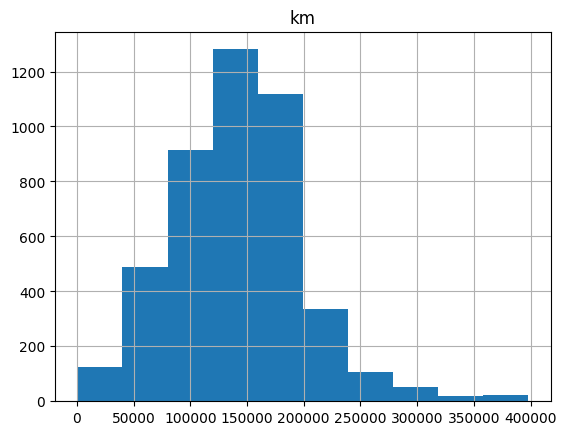

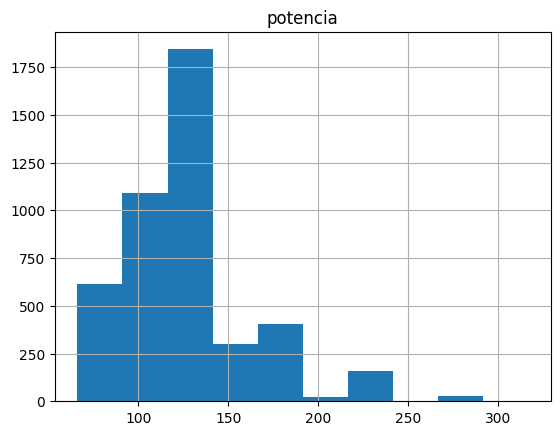

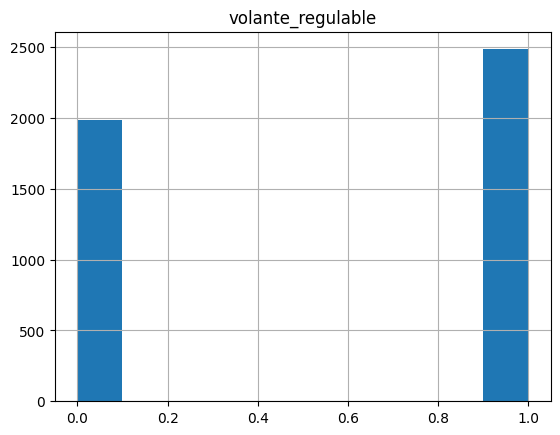

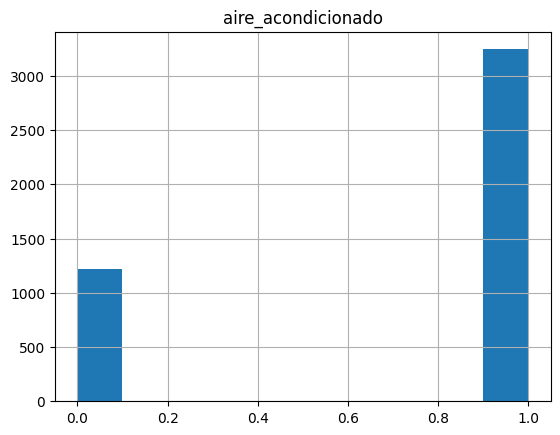

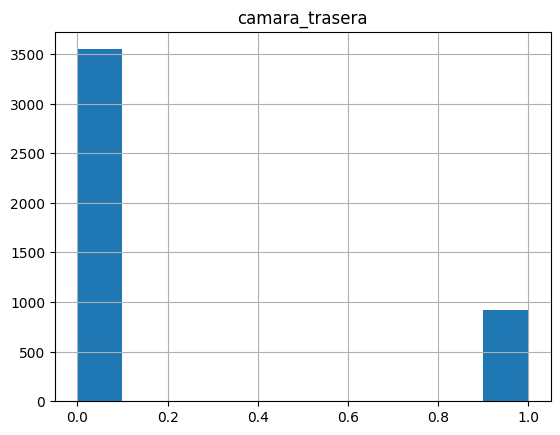

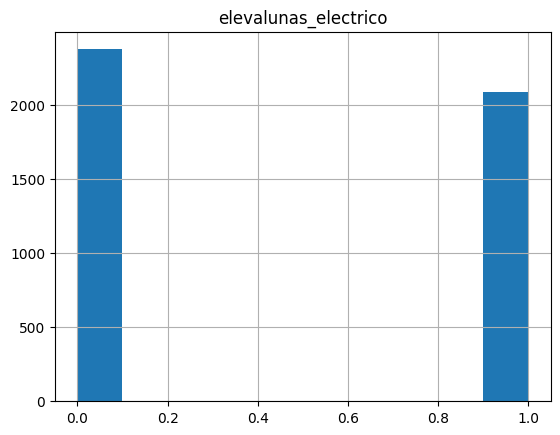

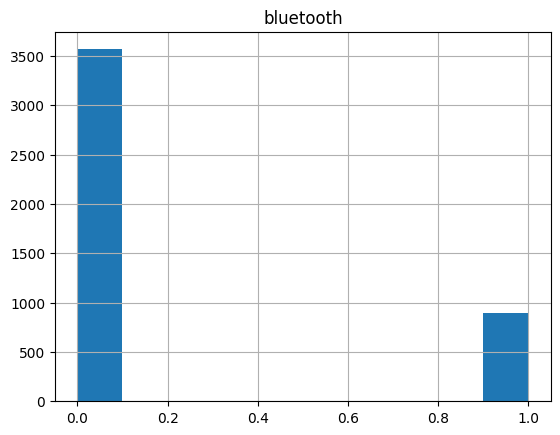

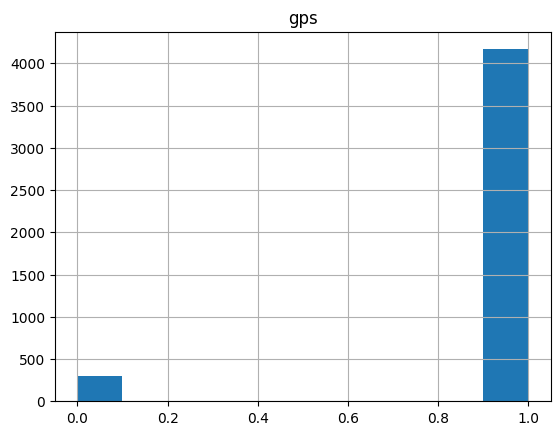

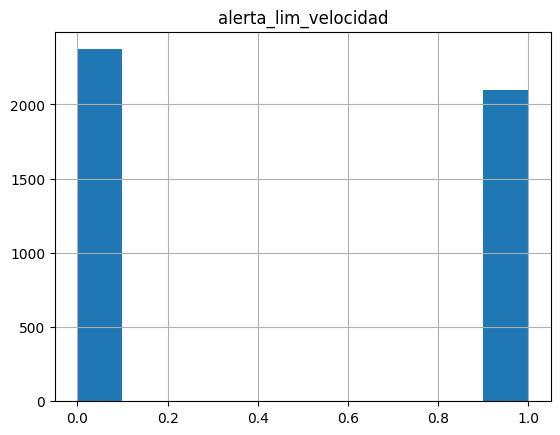

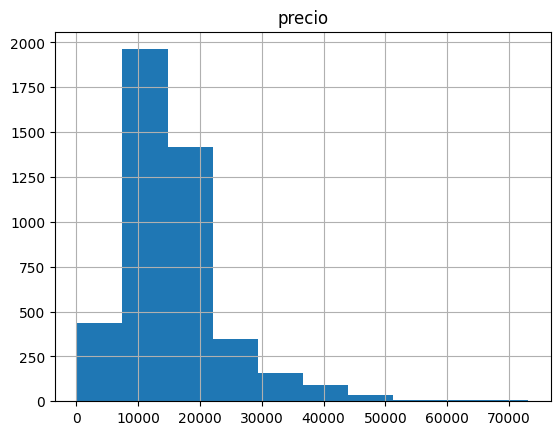

In [236]:
#Hago un bubcle para ver la información de las columnas en general.
for i in df_bmw6:
    if (df_bmw6[i].dtype.kind == "O") or (df_bmw6[i].dtype.kind == "B"):
        print(i, "\n", df_bmw6[i].value_counts(), "\n")
    elif (df_bmw6[i].dtype.kind == "f") or (df_bmw6[i].dtype.kind == "i"):
        print(df_bmw6.hist(i))

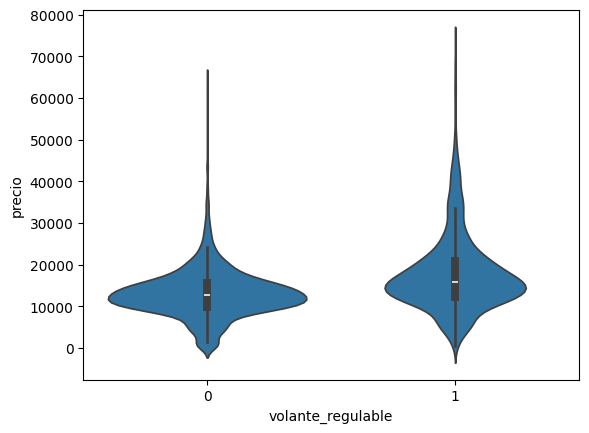

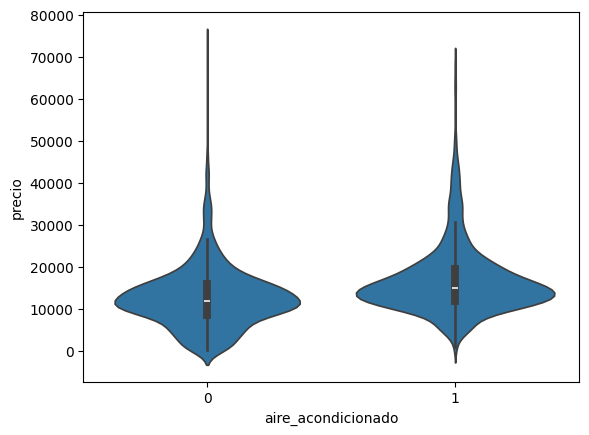

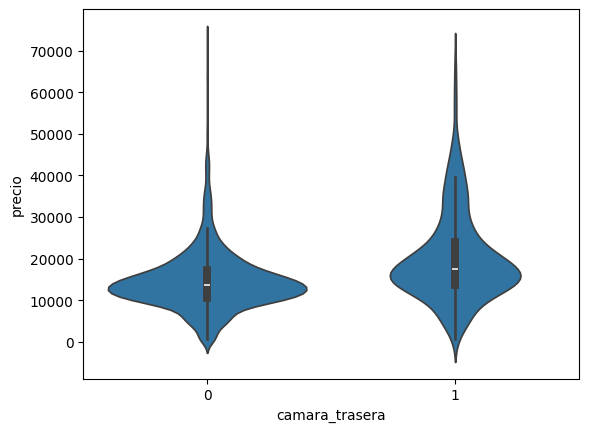

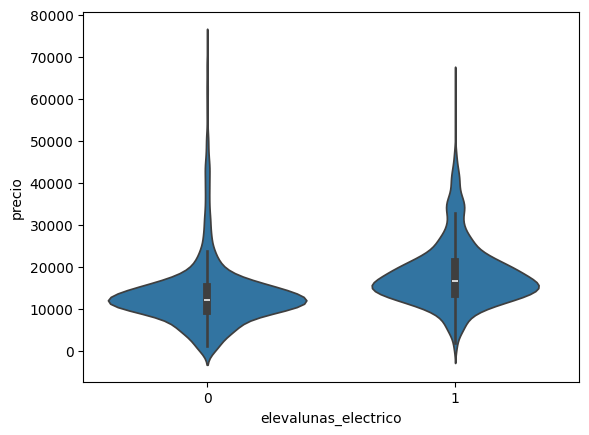

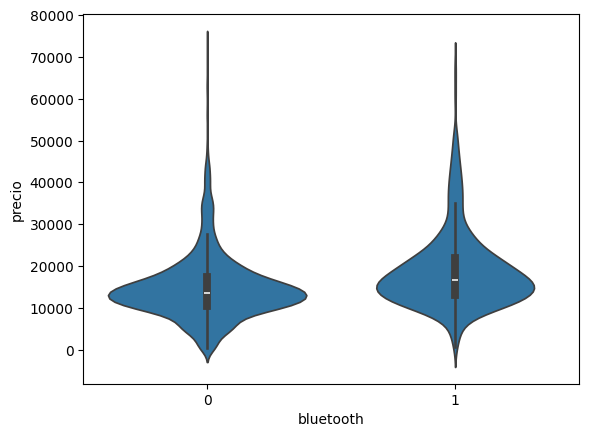

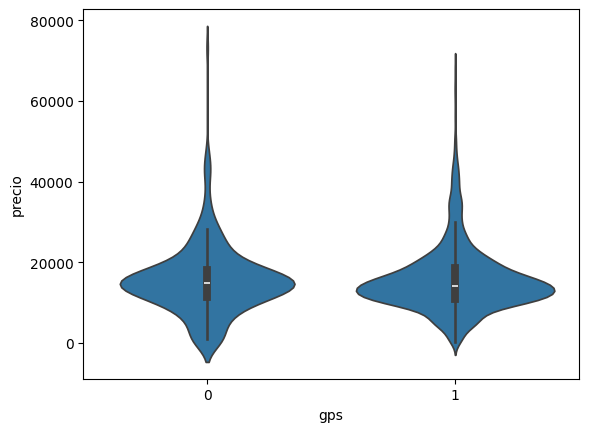

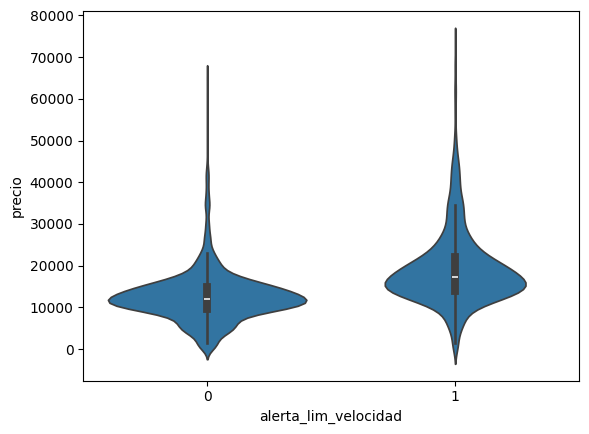

In [237]:
for i in df_bmw6:
    if (df_bmw6[i].dtype.kind == "i"):
        plt.figure()
        sns.violinplot(x=i, y="precio", data=df_bmw6)

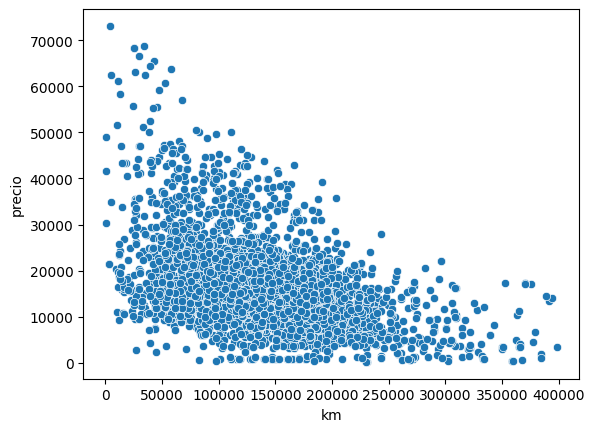

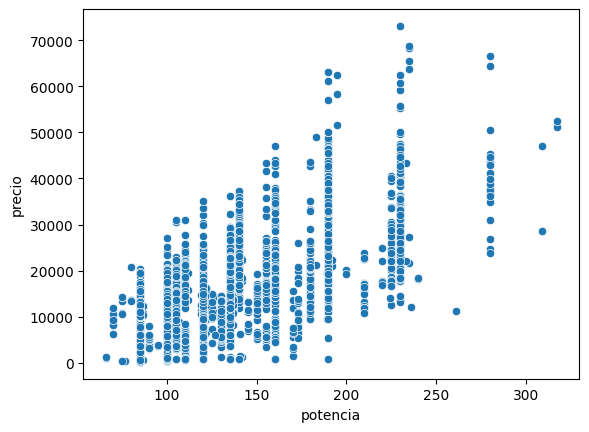

In [238]:
for i in df_bmw6:
    if (df_bmw[i].dtype.kind in ("i", "f")) and (i != "precio"):
        plt.figure()
        sns.scatterplot(x=i, y="precio", data=df_bmw6)

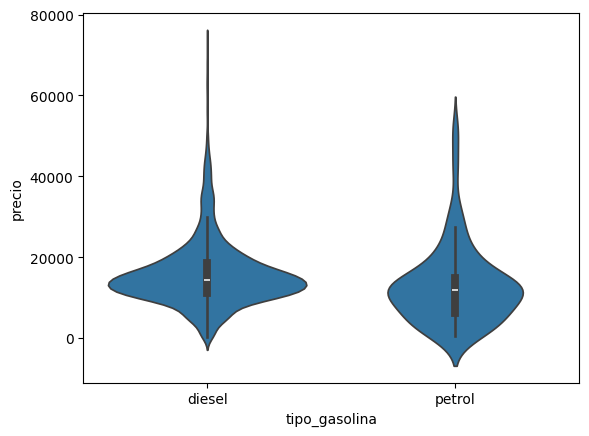

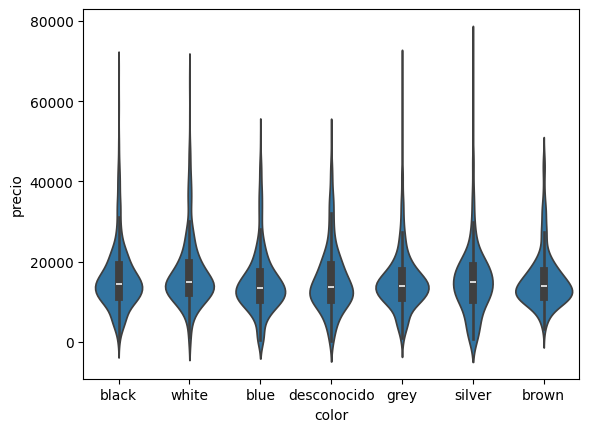

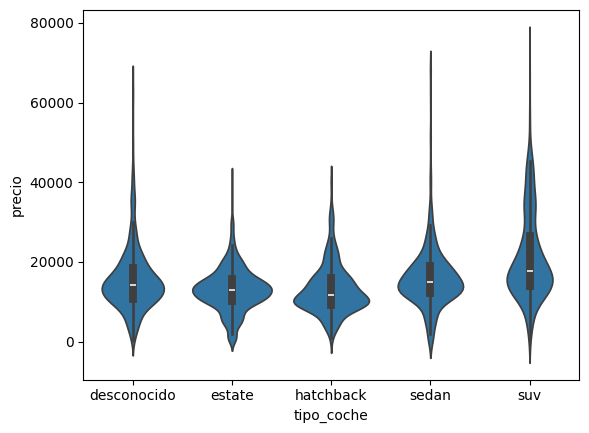

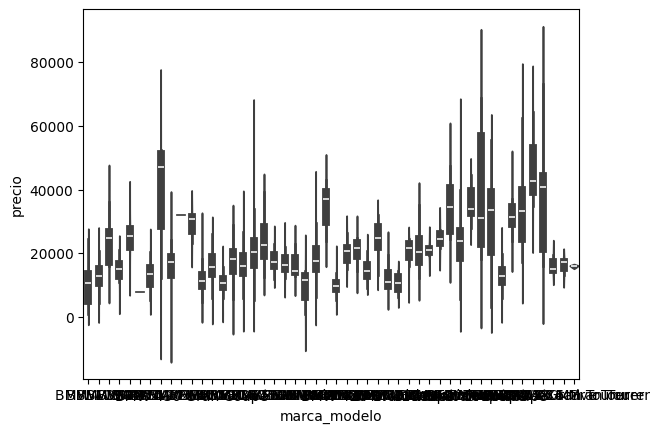

In [239]:
for i in df_bmw6:
    if (df_bmw6[i].dtype.kind == "O"):
        plt.figure()
        sns.violinplot(x=i, y="precio", data=df_bmw6)

<Axes: xlabel='precio'>

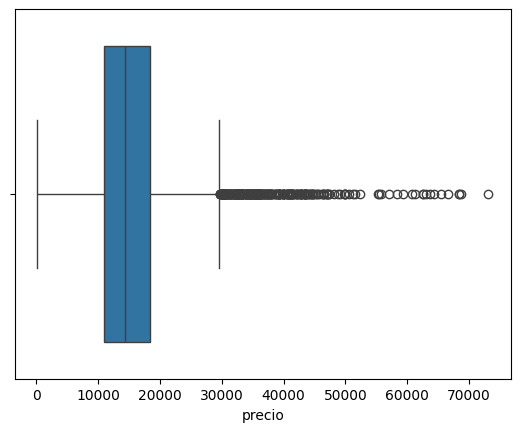

In [240]:
sns.boxplot(x=df_bmw6["precio"])

<Axes: xlabel='LOG_PRECIO'>

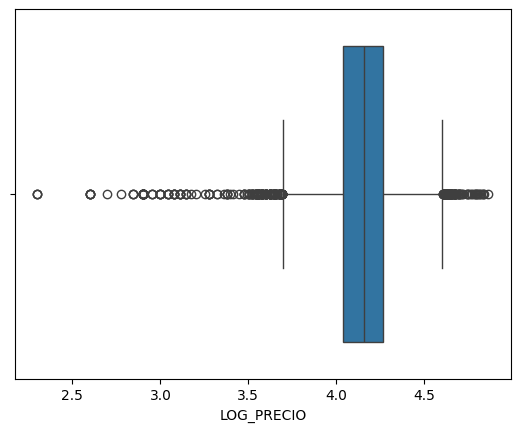

In [241]:
df_bmw6["LOG_PRECIO"]=np.log10(df_bmw6["precio"])
sns.boxplot(x=df_bmw6["LOG_PRECIO"])

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

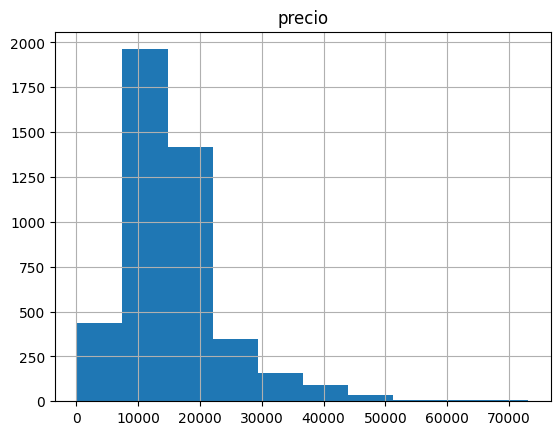

In [242]:
df_bmw6.hist("precio")

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

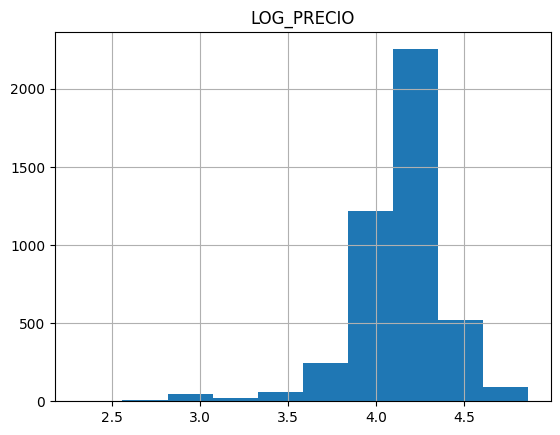

In [243]:
df_bmw6.hist("LOG_PRECIO")

In [244]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4465 non-null   float64
 1   potencia              4465 non-null   float64
 2   tipo_gasolina         4465 non-null   object 
 3   color                 4465 non-null   object 
 4   tipo_coche            4465 non-null   object 
 5   volante_regulable     4465 non-null   int64  
 6   aire_acondicionado    4465 non-null   int64  
 7   camara_trasera        4465 non-null   int64  
 8   elevalunas_electrico  4465 non-null   int64  
 9   bluetooth             4465 non-null   int64  
 10  gps                   4465 non-null   int64  
 11  alerta_lim_velocidad  4465 non-null   int64  
 12  precio                4465 non-null   float64
 13  marca_modelo          4465 non-null   object 
 14  LOG_PRECIO            4465 non-null   float64
dtypes: float64(4), int64(7), o

# Clasificación y transformación de Datos

In [247]:
#Aquí clasifico las columnas en listas numérica, booleanas o categóricas:
target= ["PRECIO","LOG_PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [250]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw6)

In [251]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'marca_modelo']

In [252]:
lista_numericas

['km', 'potencia', 'precio']

In [253]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [255]:
df_bmw6 = pd.get_dummies(data=df_bmw6, columns=lista_categoricas).astype("int64")

In [257]:
df_bmw6.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
0,140411,100,1,1,0,1,0,1,0,11300,...,0,0,0,0,0,0,0,0,0,0
2,183297,120,0,0,0,1,0,1,0,10200,...,0,0,0,0,0,0,0,0,0,0
5,152352,225,1,1,0,1,1,1,1,17100,...,0,0,0,0,0,0,0,0,0,0
11,228000,145,1,1,0,1,0,1,0,13300,...,0,0,0,0,0,0,0,0,0,0
12,132025,135,1,0,0,1,1,1,0,21700,...,0,0,0,0,0,0,0,0,0,0


In [261]:
def minmaxTransform(var_trans):
    minmaxresult = MinMaxScaler()
    df_bmw6[var_trans]=minmaxresult.fit_transform(df_bmw6[var_trans].values.reshape(-1,1))
    return minmaxresult

In [262]:
for i in lista_numericas:
    print(i)

km
potencia
precio


In [264]:
for i in lista_numericas:
    globals()[f"minMax_{i}"] = minmaxTransform(i)

In [265]:
df_bmw6.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
0,0.351978,0.135458,1,1,0,1,0,1,0,0.152263,...,0,0,0,0,0,0,0,0,0,0
2,0.459850,0.215139,0,0,0,1,0,1,0,0.137174,...,0,0,0,0,0,0,0,0,0,0
5,0.382014,0.633466,1,1,0,1,1,1,1,0.231824,...,0,0,0,0,0,0,0,0,0,0
11,0.572291,0.314741,1,1,0,1,0,1,0,0.179698,...,0,0,0,0,0,0,0,0,0,0
12,0.330885,0.274900,1,0,0,1,1,1,0,0.294925,...,0,0,0,0,0,0,0,0,0,0


In [266]:
df_bmw7 = df_bmw6.copy()

In [268]:
pd.to_pickle(df_bmw7,"/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

# Correlación final

In [271]:
corr2 = df_bmw7.corr()
corr2.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,LOG_PRECIO,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_grey,color_silver,color_white,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,marca_modelo_BMW 114,marca_modelo_BMW 116,marca_modelo_BMW 118,marca_modelo_BMW 120,marca_modelo_BMW 125,marca_modelo_BMW 135,marca_modelo_BMW 216 Gran Tourer,marca_modelo_BMW 218,marca_modelo_BMW 218 Active Tourer,marca_modelo_BMW 218 Gran Tourer,marca_modelo_BMW 316,marca_modelo_BMW 318,marca_modelo_BMW 318 Gran Turismo,marca_modelo_BMW 320,marca_modelo_BMW 320 Gran Turismo,marca_modelo_BMW 325,marca_modelo_BMW 325 Gran Turismo,marca_modelo_BMW 328,marca_modelo_BMW 330,marca_modelo_BMW 335,marca_modelo_BMW 418 Gran Coupé,marca_modelo_BMW 420,marca_modelo_BMW 420 Gran Coupé,marca_modelo_BMW 430 Gran Coupé,marca_modelo_BMW 435 Gran Coupé,marca_modelo_BMW 518,marca_modelo_BMW 520,marca_modelo_BMW 520 Gran Turismo,marca_modelo_BMW 523,marca_modelo_BMW 525,marca_modelo_BMW 528,marca_modelo_BMW 530,marca_modelo_BMW 530 Gran Turismo,marca_modelo_BMW 535,marca_modelo_BMW 640,marca_modelo_BMW 640 Gran Coupé,marca_modelo_BMW 730,marca_modelo_BMW 740,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
km,1.000000,-0.032146,0.070873,0.009099,0.004944,0.056138,-0.027951,0.170083,-0.019211,-0.426015,-0.308717,0.020381,-0.020381,0.038782,-0.020911,-0.025287,0.002306,0.025281,0.023665,-0.071639,-0.015216,0.132941,-0.109399,0.055597,-0.102028,-0.057155,-0.115527,-0.042980,-0.020442,-0.024400,-0.005489,-0.046662,-0.043634,-0.023707,-0.046311,-0.005437,0.055087,0.003805,0.088620,-0.019332,-0.031338,0.007682,-0.010206,-0.014720,-0.012357,-0.024749,-0.057319,-0.090847,-0.024365,-0.055000,0.029385,0.090862,-0.001483,0.006441,0.097258,-0.011964,0.073232,0.044840,0.027464,-0.012911,-0.014981,0.013592,-0.017275,-0.027671,-0.000886,-0.066282,-0.042565,-0.110455,-0.043129,-0.028230,-0.032111,-0.040274,-0.003424
potencia,-0.032146,1.000000,0.322185,0.155736,0.317605,0.343101,0.189559,0.007694,0.426437,0.674865,0.273423,-0.073260,0.073260,0.036518,-0.006242,-0.057991,-0.005125,-0.006918,0.025227,-0.006904,-0.016066,-0.042574,-0.199572,0.029292,0.204680,-0.075635,-0.312545,-0.114281,0.010557,0.024148,0.060531,-0.030578,-0.018180,-0.017779,-0.018942,-0.271519,-0.275585,-0.103705,-0.031059,0.015691,0.049369,0.024148,0.046158,0.129620,0.085824,-0.029999,0.006224,0.010182,0.042727,0.088528,-0.085234,-0.013646,-0.003753,0.007820,0.123940,0.054355,0.294681,0.093548,0.267985,0.040782,0.163404,0.113323,0.174782,0.152174,0.211333,-0.125303,0.051319,0.060642,0.376542,0.104808,0.215921,0.110258,-0.007576
volante_regulable,0.070873,0.322185,1.000000,0.257885,0.254473,0.268077,0.113828,0.247558,0.184741,0.285815,0.164690,0.031921,-0.031921,0.020650,0.016882,0.038438,-0.030928,0.049776,-0.013847,-0.111227,-0.030018,0.001602,-0.126236,0.056252,0.082177,-0.055623,-0.188430,-0.123331,-0.053430,-0.018449,0.018913,-0.011626,-0.018449,-0.029022,-0.029022,-0.135397,-0.102011,-0.041856,-0.103985,-0.014042,0.015860,-0.018449,-0.010520,0.012784,0.016436,0.027193,0.006448,0.029728,0.023166,0.029914,0.064611,0.178099,0.056431,0.005770,0.097563,-0.004142,0.103714,0.033276,0.061750,0.013372,0.053579,0.071831,0.056842,0.016436,0.028966,-0.101814,0.057809,0.057655,0.146425,0.055234,0.082392,0.024010,0.013372
aire_acondicionado,0.009099,0.155736,0.257885,1.000000,0.100452,0.234154,0.091914,0.308026,0.149645,0.219988,0.247137,0.072297,-0.072297,0.021917,0.000515,0.053334,-0.033462,0.017839,-0.035741,-0.042628,-0.032484,0.061981,-0.062875,0.041920,-0.022424,-0.040461,-0.128612,-0.064493,-0.041800,-0.032014,0.012987,-0.022874,-0.015219,0.015908,-0.003483,-0.022431,0.008438,0.0164

In [272]:
#Haciendo un análisis de la tabla de correlaciones, encuentro una fuerte correlación entre los tipos de gasolina por lo que procedo a eliminar estas columnas:
for i in ["tipo_gasolina_diesel", "tipo_gasolina_petrol"]:
    del(df_bmw7[i])

In [273]:
corr3 = df_bmw7.corr()
corr3.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,LOG_PRECIO,color_black,color_blue,color_brown,color_desconocido,color_grey,color_silver,color_white,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,marca_modelo_BMW 114,marca_modelo_BMW 116,marca_modelo_BMW 118,marca_modelo_BMW 120,marca_modelo_BMW 125,marca_modelo_BMW 135,marca_modelo_BMW 216 Gran Tourer,marca_modelo_BMW 218,marca_modelo_BMW 218 Active Tourer,marca_modelo_BMW 218 Gran Tourer,marca_modelo_BMW 316,marca_modelo_BMW 318,marca_modelo_BMW 318 Gran Turismo,marca_modelo_BMW 320,marca_modelo_BMW 320 Gran Turismo,marca_modelo_BMW 325,marca_modelo_BMW 325 Gran Turismo,marca_modelo_BMW 328,marca_modelo_BMW 330,marca_modelo_BMW 335,marca_modelo_BMW 418 Gran Coupé,marca_modelo_BMW 420,marca_modelo_BMW 420 Gran Coupé,marca_modelo_BMW 430 Gran Coupé,marca_modelo_BMW 435 Gran Coupé,marca_modelo_BMW 518,marca_modelo_BMW 520,marca_modelo_BMW 520 Gran Turismo,marca_modelo_BMW 523,marca_modelo_BMW 525,marca_modelo_BMW 528,marca_modelo_BMW 530,marca_modelo_BMW 530 Gran Turismo,marca_modelo_BMW 535,marca_modelo_BMW 640,marca_modelo_BMW 640 Gran Coupé,marca_modelo_BMW 730,marca_modelo_BMW 740,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
km,1.000000,-0.032146,0.070873,0.009099,0.004944,0.056138,-0.027951,0.170083,-0.019211,-0.426015,-0.308717,0.038782,-0.020911,-0.025287,0.002306,0.025281,0.023665,-0.071639,-0.015216,0.132941,-0.109399,0.055597,-0.102028,-0.057155,-0.115527,-0.042980,-0.020442,-0.024400,-0.005489,-0.046662,-0.043634,-0.023707,-0.046311,-0.005437,0.055087,0.003805,0.088620,-0.019332,-0.031338,0.007682,-0.010206,-0.014720,-0.012357,-0.024749,-0.057319,-0.090847,-0.024365,-0.055000,0.029385,0.090862,-0.001483,0.006441,0.097258,-0.011964,0.073232,0.044840,0.027464,-0.012911,-0.014981,0.013592,-0.017275,-0.027671,-0.000886,-0.066282,-0.042565,-0.110455,-0.043129,-0.028230,-0.032111,-0.040274,-0.003424
potencia,-0.032146,1.000000,0.322185,0.155736,0.317605,0.343101,0.189559,0.007694,0.426437,0.674865,0.273423,0.036518,-0.006242,-0.057991,-0.005125,-0.006918,0.025227,-0.006904,-0.016066,-0.042574,-0.199572,0.029292,0.204680,-0.075635,-0.312545,-0.114281,0.010557,0.024148,0.060531,-0.030578,-0.018180,-0.017779,-0.018942,-0.271519,-0.275585,-0.103705,-0.031059,0.015691,0.049369,0.024148,0.046158,0.129620,0.085824,-0.029999,0.006224,0.010182,0.042727,0.088528,-0.085234,-0.013646,-0.003753,0.007820,0.123940,0.054355,0.294681,0.093548,0.267985,0.040782,0.163404,0.113323,0.174782,0.152174,0.211333,-0.125303,0.051319,0.060642,0.376542,0.104808,0.215921,0.110258,-0.007576
volante_regulable,0.070873,0.322185,1.000000,0.257885,0.254473,0.268077,0.113828,0.247558,0.184741,0.285815,0.164690,0.020650,0.016882,0.038438,-0.030928,0.049776,-0.013847,-0.111227,-0.030018,0.001602,-0.126236,0.056252,0.082177,-0.055623,-0.188430,-0.123331,-0.053430,-0.018449,0.018913,-0.011626,-0.018449,-0.029022,-0.029022,-0.135397,-0.102011,-0.041856,-0.103985,-0.014042,0.015860,-0.018449,-0.010520,0.012784,0.016436,0.027193,0.006448,0.029728,0.023166,0.029914,0.064611,0.178099,0.056431,0.005770,0.097563,-0.004142,0.103714,0.033276,0.061750,0.013372,0.053579,0.071831,0.056842,0.016436,0.028966,-0.101814,0.057809,0.057655,0.146425,0.055234,0.082392,0.024010,0.013372
aire_acondicionado,0.009099,0.155736,0.257885,1.000000,0.100452,0.234154,0.091914,0.308026,0.149645,0.219988,0.247137,0.021917,0.000515,0.053334,-0.033462,0.017839,-0.035741,-0.042628,-0.032484,0.061981,-0.062875,0.041920,-0.022424,-0.040461,-0.128612,-0.064493,-0.041800,-0.032014,0.012987,-0.022874,-0.015219,0.015908,-0.003483,-0.022431,0.008438,0.016487,-0.054898,0.006545,0.003156,0.001576,0.005518,-0.011048,0.005518,0.002230,-0.004150,0.023607,0.015908,0.005518,0.02

In [303]:
#Con todo el DataFrame limpio y preparado hasta este punto, procedo a exportarlo a un documento CSV para una posterior manipulaciòn en ejercicios futuros.
df_bmw7.to_csv("df_limpio.csv", index=False)
df_bmw7.to_excel("df_limpio.xlsx", index= False)

In [304]:
df_bmw8= df_bmw7.copy()

In [305]:
pd.to_pickle(df_bmw8, "/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_final_15ENE24_PK")

In [306]:
df_final = pd.read_pickle("primera_entrega_final_15ENE24_PK")